# Parlay Grader

### * There are 5 questions the customer can answer either Yes or No to, or choose not to answer.

#### The Hypothetical Probability of each question/answer occurring is below:

##### 1Yes = 50% 1No = 50%

##### 2Yes = 20% 2No = 80% 

##### 3Yes = 30% 3No = 70%

##### 4Yes = 10% 4No = 90%

##### 5Yes = 50% 5No = 50%


Text(0, 0.5, 'Probability')

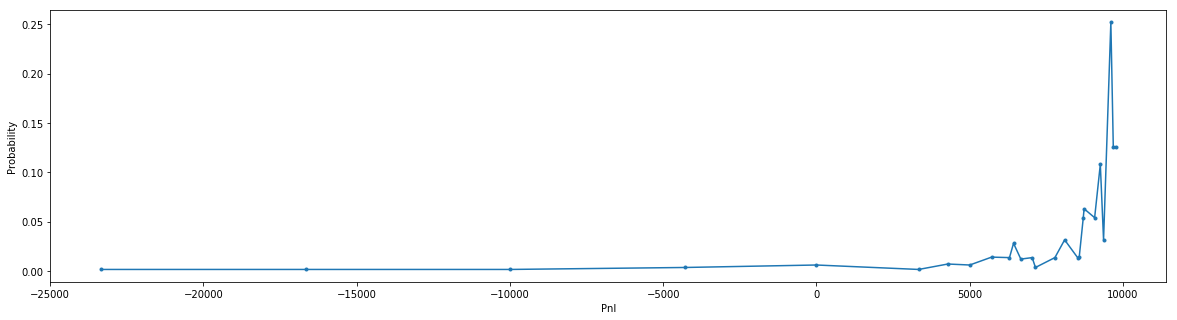

In [2]:
import itertools
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline, BSpline


#Set number of parlay submissions and bet_size

submissions=1000
bet_size = 10

# Let Y=Yes, N=No, B=Blank
# Lists of choices by question 

one = ['1Y','1N','1B']
two = ['2Y','2N','2B']
three = ['3Y','3N','3B']
four = ['4Y','4N','4B']
five = ['5Y','5N','5B']

#Combined list of all choices

ans_list = one,two,three,four,five

#Generate total combos of submissions
#(3^5) - 11 = 232
#11 combos have 4 or more 'B's(Blanks), which are not valid parlay submissions

c = list(itertools.product(*ans_list))
c = list(filter(lambda x: sum('B' in s for s in x)<4, c))
c = [list(i) for i in c]
c = np.asarray(c)

#Dictionary of probabilities for each question and response

par_dict = {'1Y':.5, '1N':.5, '1B':1,\
            '2Y':.2, '2N':.8, '2B':1,\
            '3Y':.3, '3N':.7, '3B':1,\
            '4Y':.1, '4N':.9, '4B':1,\
            '5Y':.5, '5N':.5, '5B':1}

#Map probabilities and zip to array 

maps=[]
for i in c:
    r = list(map(par_dict.get, i))
    r = np.asarray(r)
    r = np.prod(r)
    maps.append(r)

combos = list(zip(c,maps))


#Calculate customer profit if parlay wins and add column to dataframe 

cust_profit = list(map(lambda x: (1/x*bet_size), maps))
combos2=list(zip(combos,cust_profit))


#Randomly choose a number of submissions to grade from the 232 total combo list

rc = random.choices(combos2, k=submissions)

#Build list of 'Truth' possible outcomes (32)

one_ = ['1Y','1N']
two_ = ['2Y','2N']
three_ = ['3Y','3N']
four_ = ['4Y','4N']
five_ = ['5Y','5N']

lis2 = one_,two_,three_,four_,five_

Outcomes = list(itertools.product(*lis2))

#Map probabilities to each of those outcomes

maps2=[]
for i in Outcomes:
    q = list(map(par_dict.get, i))
    q = np.asarray(q)
    q = np.prod(q)
    maps2.append(q)


#Outcome/Probability map

Outcomes2 = list(zip(Outcomes,maps2))
Outcomes2 = np.asarray(Outcomes2)

#Evaluating submissions vs possible outcomes
#Create Dictionary of 32 Truth Outcomes and cumulative payouts to customer 

Pnl={}

for j in range(0,len(Outcomes2)):
    sum_=0
    for i in range(0,len(rc)):
        if np.all(rc[i][0][0] == Outcomes2[j][0]):
            sum_-= rc[i][1]
            
    Pnl[ Outcomes2[j][0] ] = sum_


#Convert Dictionary to list-->DataFrame 

lis3 = [ [k,v] for k, v in Pnl.items() ]

lis3 = pd.DataFrame(lis3)


#Create Column for Sportsbook Gain/Loss

lis3[2] = lis3[1] + bet_size*submissions

#Add probability of combo occurring, drop extra column

lis3[3] = Outcomes2[:,1]
lis3=lis3.drop([1], axis=1)


#Add column names, groupby and plot

lis3.columns=['Combo','Pnl','Probability']


#Plot probability distribution

Final = lis3.groupby(['Pnl']).sum().interpolate(method='cubic').plot(figsize=(20,5),legend=False,marker=".")
plt.ylabel('Probability')